Load & Prepare Data

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/credit_score.csv")

# Drop ID column
df.drop("CUST_ID", axis=1, inplace=True)

# Check for nulls
df = df.dropna()  # or use df.fillna(df.median(), inplace=True)


Split Features & Target

In [ ]:
X = df.drop("DEFAULT", axis=1)
y = df["DEFAULT"]


Handle Categorical Columns

In [ ]:
# Get dummies for categorical columns
X = pd.get_dummies(X, drop_first=True)


Train-Test Split & Scale

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Logistic Regression & Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Both Models

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
print("Logistic Regression")
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

# Random Forest
print("\nRandom Forest")
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Logistic Regression
[[194  22]
 [ 58  26]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       216
           1       0.54      0.31      0.39        84

    accuracy                           0.73       300
   macro avg       0.66      0.60      0.61       300
weighted avg       0.71      0.73      0.71       300

ROC AUC: 0.648533950617284

Random Forest
[[194  22]
 [ 68  16]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       216
           1       0.42      0.19      0.26        84

    accuracy                           0.70       300
   macro avg       0.58      0.54      0.54       300
weighted avg       0.65      0.70      0.66       300

ROC AUC: 0.6621197089947091


(Optional) Feature Importance

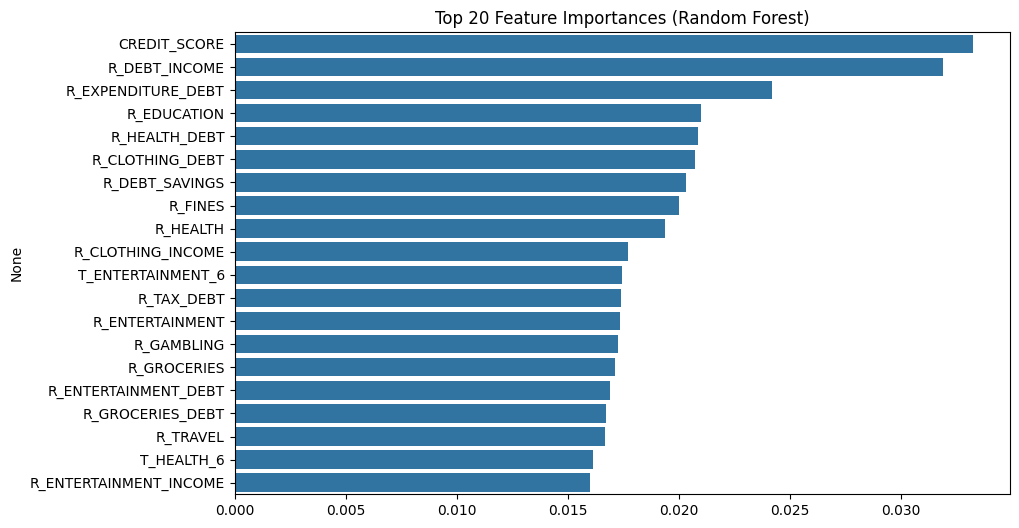

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf.feature_importances_
features = X.columns

# Plot top 20 important features
top_n = 20
sorted_idx = feature_importances.argsort()[::-1][:top_n]

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()


ROC Curve Plot

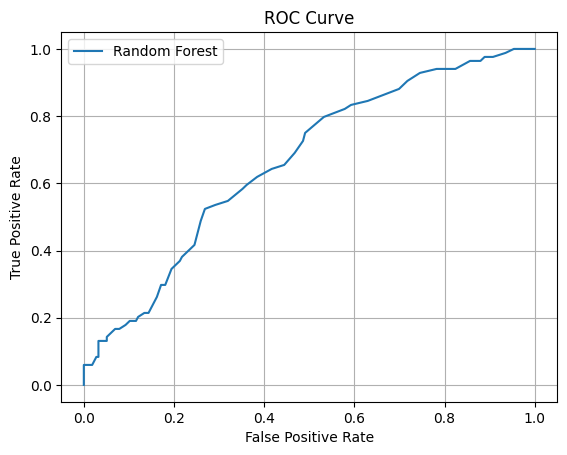

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Decision Tree")
print(classification_report(y_test, dt.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


Decision Tree
              precision    recall  f1-score   support

           0       0.74      0.67      0.71       216
           1       0.32      0.40      0.36        84

    accuracy                           0.60       300
   macro avg       0.53      0.54      0.53       300
weighted avg       0.63      0.60      0.61       300

ROC AUC: 0.5380291005291005


Hyperparameter Tuning (Optional)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)


Best parameters: {'max_depth': 5, 'n_estimators': 100}


Model Saving (for deployment or demo)

In [ ]:
import joblib
joblib.dump(rf, "credit_model.pkl")


['credit_model.pkl']